Returns: https://www.dillards.com/c/returns
- Purchases outside these dates will follow our standard 30 day return policy.
- Bring any merchandise eligible for return to a Dillard's location near you (excluding clearance centers) along with your receipt or proof of purchase.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import holidays
from datetime import datetime

In [2]:
df = pd.read_csv("test.csv")
df 

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP
0,1000007,2005-08-05,744804315,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032
1,1000007,2005-08-09,478109057,P,1,16.0,16.00,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226
2,1000007,2005-08-09,554308032,P,1,16.0,16.00,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070
3,1000007,2005-08-11,141107309,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032
4,1000007,2005-08-19,56509933,P,1,16.0,16.00,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266266,9999997,2005-04-24,726601646,P,1,39.0,39.00,AUSTIN,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78746
22266267,9999997,2005-05-05,854805967,P,1,39.0,39.00,SAN ANTONIO,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78216
22266268,9999997,2005-06-08,384909302,R,1,39.0,39.00,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015
22266269,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015


In [3]:
df = df[df["ORGPRICE"] > 0]

In [4]:
df["STYPE"].value_counts()

P    20767217
R     1097188
Name: STYPE, dtype: int64

In [5]:
df["discount"] = df["AMT"] / (df["ORGPRICE"] * df["QUANTITY"])
df["discount_flag"] = (df["discount"] < 1).astype(int)

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/2349951998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["discount"] = df["AMT"] / (df["ORGPRICE"] * df["QUANTITY"])
/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/2349951998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["discount_flag"] = (df["discount"] < 1).astype(int)


There are infinite values. Can we set as a number? 

In [6]:
us_holidays = holidays.US()
df['holiday_flag'] = df['SALEDATE'].isin(us_holidays).astype(int)
df

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/2546841473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday_flag'] = df['SALEDATE'].isin(us_holidays).astype(int)


,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP,discount,discount_flag,holiday_flag
0,1000007,2005-08-05,744804315,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.00,0,0
1,1000007,2005-08-09,478109057,P,1,16.0,16.00,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226,1.00,0,0
2,1000007,2005-08-09,554308032,P,1,16.0,16.00,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070,1.00,0,0
3,1000007,2005-08-11,141107309,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.00,0,0
4,1000007,2005-08-19,56509933,P,1,16.0,16.00,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243,1.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266266,9999997,2005-04-24,726601646,P,1,39.0,39.00,AUSTIN,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78746,1.00,0,0
22266267,9999997,2005-05-05,854805967,P,1,39.0,39.00,SAN ANTONIO,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78216,1.00,0,0
22266268,9999997,2005-06-08,384909302,R,1,39.0,39.00,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015,1.00,0,0
22266269,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015,0.80,1,0


In [7]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
df['weekend_flag'] = (df['SALEDATE'].dt.weekday.astype(int) >= 5).astype(int)
df

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/2147893750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/2147893750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekend_flag'] = (df['SALEDATE'].dt.weekday.astype(int) >= 5).astype(int)


,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP,discount,discount_flag,holiday_flag,weekend_flag
0,1000007,2005-08-05,744804315,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.00,0,0,0
1,1000007,2005-08-09,478109057,P,1,16.0,16.00,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226,1.00,0,0,0
2,1000007,2005-08-09,554308032,P,1,16.0,16.00,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070,1.00,0,0,0
3,1000007,2005-08-11,141107309,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.00,0,0,0
4,1000007,2005-08-19,56509933,P,1,16.0,16.00,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243,1.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266266,9999997,2005-04-24,726601646,P,1,39.0,39.00,AUSTIN,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78746,1.00,0,0,1
22266267,9999997,2005-05-05,854805967,P,1,39.0,39.00,SAN ANTONIO,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78216,1.00,0,0,0
22266268,9999997,2005-06-08,384909302,R,1,39.0,39.00,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015,1.00,0,0,0
22266269,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015,0.80,1,0,0


In [8]:
color_dict = {
    'black': ['black', 'blk', 'onyx', 'obsidian'],
    'blue': ['blue', 'navy', 'indigo', 'denim', 'royal', 'nav', 'midnight', 'newport', 'aqua', 'turquoise', 'turq', 'teal'], 
    'red': ['red', 'burgundy', 'cardinals', 'wine', 'maroon', 'cardinal', 'ruby'],
    'white': ['white', 'cream', 'ivory', 'wht', 'wh', 'vanilla'],
    'pink': ['pink', 'rose', 'fuchsia', 'fuschia', 'berry'],
    'brown': ['brown', 'tan', 'khaki', 'chocolate', 'camel', 'beige', 'espresso', 'bronze', 'natural', 'taupe'],
    'grey': ['grey', 'silver', 'charcoal', 'stone'],
    'yellow': ['yellow', 'gold', 'champagne', 'sand'],
    'green': ['green', 'olive', 'lime', 'sage'],
    'orange': ['orange', 'coral'],
    'purple': ['purple', 'lilac', 'plum', 'lavender'],
    'multi': ['multi', 'assorted', 'asst']
}

In [9]:
def replace_color(text):
    for group, lst in color_dict.items():
        for word in lst:
            if word in text.lower():
                return group
    return "other"

In [10]:
df["COLOR"] = df["COLOR"].astype(str)
df["color_group"] = df["COLOR"].apply(replace_color)

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/55395762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COLOR"] = df["COLOR"].astype(str)
/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/55395762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["color_group"] = df["COLOR"].apply(replace_color)


In [11]:
color_count = df["color_group"].value_counts().reset_index()
color_count

,index,color_group
0,other,9580787
1,black,2888301
2,white,2561851
3,blue,1721424
4,brown,1083490
5,pink,1021494
6,multi,660506
7,red,602701
8,grey,461214
9,yellow,452151


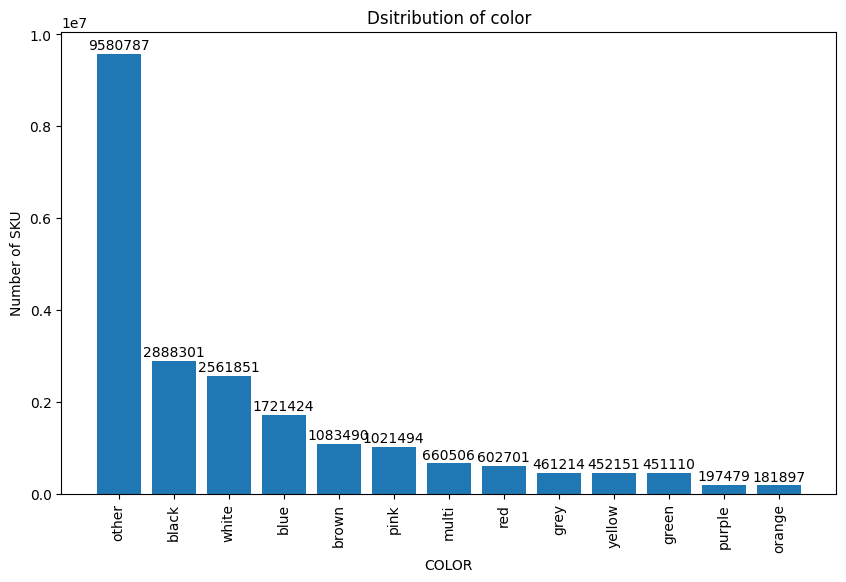

In [12]:
plt.figure(figsize=(10,6))
bars = plt.bar(color_count["index"], color_count["color_group"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("COLOR")
plt.ylabel("Number of SKU")
plt.title("Dsitribution of color")
plt.show();

In [13]:
size_dict = {
    'large': ["L", "XL", "XXL", "XXXL", "4X", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "22", "24", "25", "26", "27", "28", "29", "30", "31", "32", "34", 
              "35", "36", "37", "38", "1X", "2X", "3X", "6X", "130M", "120M", "115M", "110M", "105M", "100M", "095M","100N", "095N", "090M", "090N", "090W", "XLT", "2XT", "3XT", "4XT", 
              "16W", "18W", "20W", "22W", "24W", "L    ND", "XL   ND", "XXL  ND", "LT", "2T", "3T", "LARGE"] ,
    'small': ["M", "S", "XS", "XXS", "00", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "085M", "080M", "075M", "070M", "065M", "060M", "055M", "050M", "085N", "080N", 
              "075N", "070N", "085W", "080W", "075W", "070W", "M    ND", "S    ND"],
    "one": ["ALL", "ONE", "NO SIZE"]
}

In [14]:
def replace_size(text):
    for group, lst in size_dict.items():
        for word in lst:
            if word == text:
                return group
    return "other"

In [15]:
df["SIZE"] = df["SIZE"].str.strip()
df["size_group"] = df["SIZE"].apply(replace_size)

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/3418902829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SIZE"] = df["SIZE"].str.strip()
/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_6926/3418902829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size_group"] = df["SIZE"].apply(replace_size)


In [16]:
size_count = df["size_group"].value_counts().reset_index()
size_count

,index,size_group
0,other,7487061
1,large,5693187
2,small,5320433
3,one,3363724


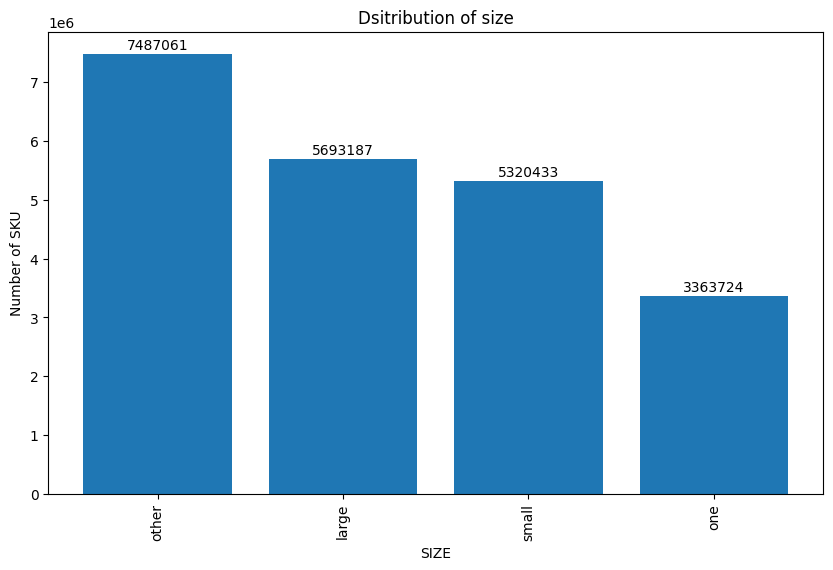

In [17]:
plt.figure(figsize=(10,6))
bars = plt.bar(size_count["index"], size_count["size_group"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("SIZE")
plt.ylabel("Number of SKU")
plt.title("Dsitribution of size")
plt.show();

Economic factors

In [18]:
econ = pd.read_csv("econ-popdata.csv")
econ.head()

,Unnamed: 0,ZIP,pop_sum,GDP2004_sum,GDP2005_sum,poverty_sum,median_income
0,0,501,1493350,74117244,74545223,74833,76697.0
1,1,1001,463490,18994298,19035742,73233,41998.0
2,2,1002,229452,8349269,8423852,23283,47989.0
3,3,1003,158080,5719878,5807855,15394,49233.0
4,4,1004,158080,5719878,5807855,15394,49233.0


In [19]:
econ = econ.drop(columns = ["Unnamed: 0"])

In [20]:
from sklearn.cluster import KMeans

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

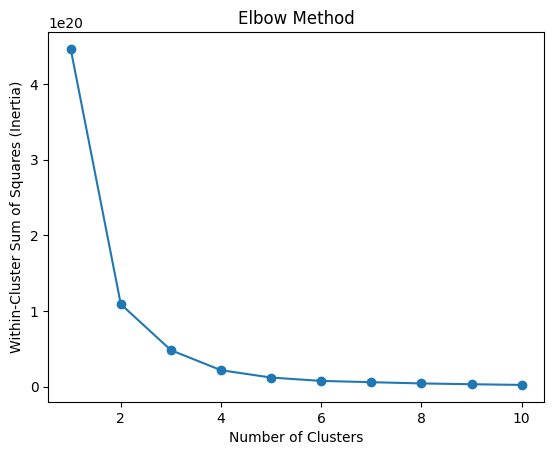

In [21]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(econ)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

Based on elbow method, the optimal number of cluster is 2.

In [22]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(econ)
labels = kmeans.labels_
econ["econ_label"] = labels
econ["econ_label"].value_counts()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    36483
1     1092
Name: econ_label, dtype: int64

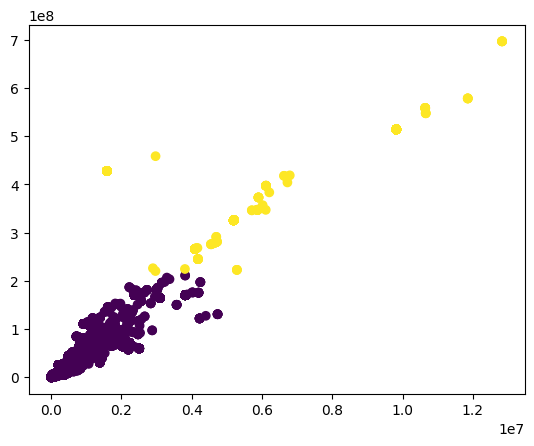

In [23]:
plt.scatter(econ["pop_sum"], econ["GDP2004_sum"], c = econ["econ_label"]);

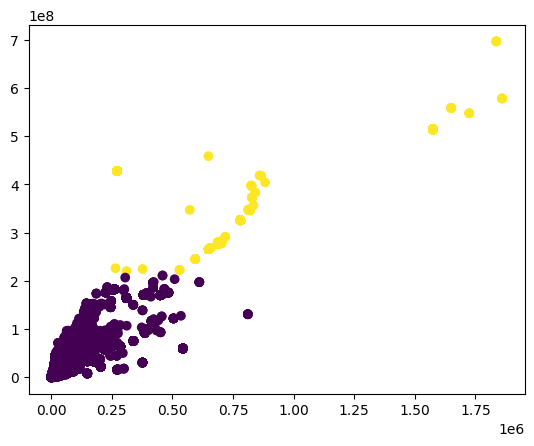

In [24]:
plt.scatter(econ["poverty_sum"], econ["GDP2004_sum"], c = econ["econ_label"]);

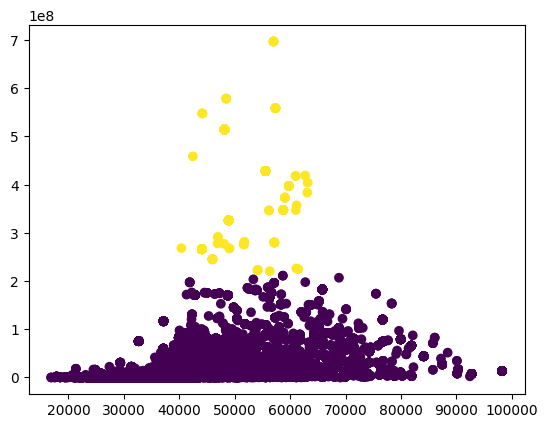

In [25]:
plt.scatter(econ["median_income"], econ["GDP2004_sum"], c = econ["econ_label"]);

In [26]:
len(df)

21864405

In [27]:
df = df.merge(econ, on = "ZIP")
df.head()

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,...,holiday_flag,weekend_flag,color_group,size_group,pop_sum,GDP2004_sum,GDP2005_sum,poverty_sum,median_income,econ_label
0,1000007,2005-08-05,744804315,P,1,16.0,16.0,PHOENIX,AZ,7.0,...,0,0,blue,large,3817117,170280673,183974768,450439,48752.0,0
1,1000007,2005-08-11,141107309,P,1,16.0,16.0,PHOENIX,AZ,7.0,...,0,0,blue,large,3817117,170280673,183974768,450439,48752.0,0
2,100031,2005-08-06,381401199,P,1,7.0,6.0,PHOENIX,AZ,3.0,...,0,1,purple,large,3817117,170280673,183974768,450439,48752.0,0
3,1000331,2004-09-03,948808599,P,1,20.0,20.0,PHOENIX,AZ,8.5,...,0,0,pink,other,3817117,170280673,183974768,450439,48752.0,0
4,1000331,2004-09-13,857202927,P,1,20.0,20.0,PHOENIX,AZ,8.5,...,0,0,pink,other,3817117,170280673,183974768,450439,48752.0,0


In [28]:
len(df)

20160292

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
keep = ["QUANTITY", "ORGPRICE", "AMT", "COST", "RETAIL", "discount", "discount_flag", "holiday_flag", "weekend_flag", "econ_label"]

In [31]:
X = pd.concat([df[keep], pd.get_dummies(df[["color_group", "size_group"]])], axis = 1)
X.head()

,QUANTITY,ORGPRICE,AMT,COST,RETAIL,discount,discount_flag,holiday_flag,weekend_flag,econ_label,...,color_group_other,color_group_pink,color_group_purple,color_group_red,color_group_white,color_group_yellow,size_group_large,size_group_one,size_group_other,size_group_small
0,1,16.0,16.0,7.0,16.0,1.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,16.0,16.0,7.0,16.0,1.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,7.0,6.0,3.0,7.0,0.857143,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,20.0,20.0,8.5,20.0,1.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,20.0,20.0,8.5,20.0,1.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [32]:
X.columns

Index(['QUANTITY', 'ORGPRICE', 'AMT', 'COST', 'RETAIL', 'discount',
       'discount_flag', 'holiday_flag', 'weekend_flag', 'econ_label',
       'color_group_black', 'color_group_blue', 'color_group_brown',
       'color_group_green', 'color_group_grey', 'color_group_multi',
       'color_group_orange', 'color_group_other', 'color_group_pink',
       'color_group_purple', 'color_group_red', 'color_group_white',
       'color_group_yellow', 'size_group_large', 'size_group_one',
       'size_group_other', 'size_group_small'],
      dtype='object')

In [33]:
y = (df["STYPE"] == "R").astype(int)
y.value_counts()

0    19147236
1     1013056
Name: STYPE, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y_train.value_counts()

0    15318001
1      810232
Name: STYPE, dtype: int64

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [40]:
y_resampled.value_counts()

0    1620464
1     810232
Name: STYPE, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor